# Build a Machine Learning Model to Recognize Handwritten Digits.

## 1: Get the data.

In [2]:
# Fetch the data from openML.org
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False, parser='auto') # An efficient method of accessing ARFF files.

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
# Split the data into train and test sets. Shuffling is not required as it has already been done.

X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

## 2: Visualize training data.

In [7]:
# Check the distribution of numbers in train and test set to make sure test set is representative of trained model.
import pandas as pd
import numpy as np

train_labels = pd.DataFrame(y_train.reshape(-1, 1), columns=["Train"])
print(train_labels["Train"].value_counts().sort_index() / len(train_labels))

test_labels = pd.DataFrame(y_test.reshape(-1, 1), columns=["Test"])
print(test_labels["Test"].value_counts().sort_index() / len(test_labels))

Train
0    0.098717
1    0.112367
2    0.099300
3    0.102183
4    0.097367
5    0.090350
6    0.098633
7    0.104417
8    0.097517
9    0.099150
Name: count, dtype: float64
Test
0    0.0980
1    0.1135
2    0.1032
3    0.1010
4    0.0982
5    0.0892
6    0.0958
7    0.1028
8    0.0974
9    0.1009
Name: count, dtype: float64


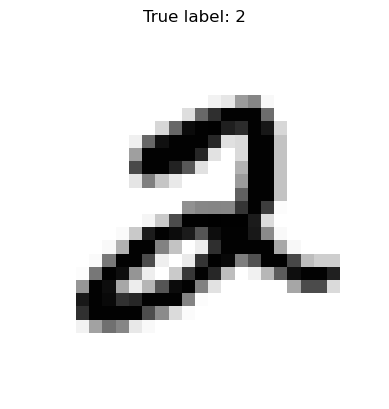

In [8]:
# Plot one of the numbers.
import matplotlib.pyplot as plt
import numpy as np

idx = 5
some_img = X_train[idx]

plt.imshow(some_img.reshape(28, 28), cmap="binary")
plt.axis("off")
plt.title(f"True label: {y_train[idx]}")
plt.show()

## 3: Explore Different Models and Short List Best Models.

In [9]:
# Preprocess the data first.
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

preprocessing = make_pipeline(StandardScaler())

### 3-1: Support vector machine classifier

In [25]:
# One vs One classifier: SVC
from sklearn.svm import SVC

sv_clf = make_pipeline(preprocessing, SVC(random_state=42))

sv_clf.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('svc', SVC(random_state=42))])

In [26]:
# Saving the results of the model to compensate training time.
from joblib import dump, load

dump(sv_clf, "ovoSVC.pkl")

['ovoSVC.pkl']

In [32]:
# Sanity test.
print(sv_clf.predict([some_img]))
print(sv_clf.decision_function([some_img]).round(2))

['2']
[[ 3.76  0.7   9.32  7.13  4.83  2.74 -0.29  2.76  8.28  5.06]]


In [33]:
# Performance metric on train and cross validation sets: Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

sv_train_pred = sv_clf.predict(X_train)
sv_cv_pred = cross_val_predict(estimator=sv_clf, X=X_train, y=y_train, cv=3)

print(f"Accuracy on training set: {accuracy_score(y_train, sv_train_pred)}")
print(f"Accuracy on cross validation set: {accuracy_score(y_train, sv_cv_pred)}")

Accuracy on training set: 0.9866333333333334
Accuracy on cross validation set: 0.9601333333333333


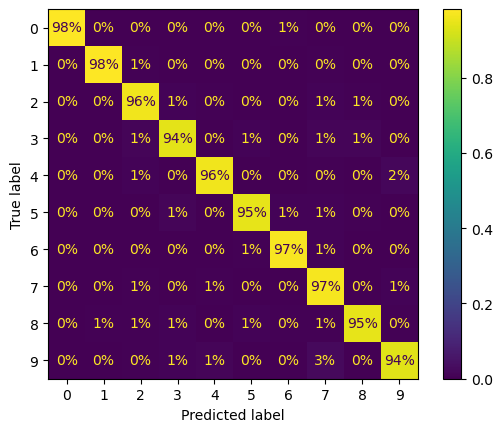

In [35]:
# Display confusion matrix from the predictions of this model.
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, sv_cv_pred, normalize="true", values_format=".0%")
plt.show()

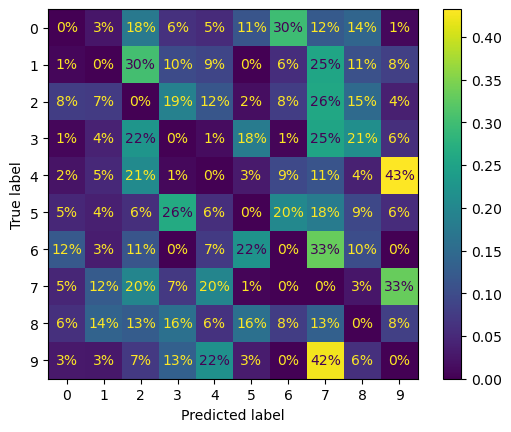

In [37]:
# Impose zero sample weight on correct predictions for making errors stand out.
sample_weights = (y_train != sv_cv_pred)
ConfusionMatrixDisplay.from_predictions(y_train, sv_cv_pred, normalize="true", values_format=".0%", sample_weight=sample_weights)
plt.show()

### 3-2: Stochastic Gradient Descent Classifier

In [39]:
# SGD classifier.
from sklearn.linear_model import SGDClassifier

sgd_clf = make_pipeline(preprocessing, SGDClassifier(random_state=42))

sgd_clf.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('sgdclassifier', SGDClassifier(random_state=42))])

In [43]:
# Saving the results of the model to compensate training time.
from joblib import dump, load

dump(sgd_clf, "ovrSGD.pkl")

['ovrSGD.pkl']

In [44]:
# Sanity test.
print(sgd_clf.predict([some_img]))
print(sgd_clf.decision_function([some_img]).round(2))

['2']
[[ -853.72 -1456.37   162.53  -500.   -1136.4   -461.09 -1181.48 -1152.89
    -15.78  -986.84]]


In [46]:
# Performance metric on train and cross validation sets: Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

sgd_train_pred = sgd_clf.predict(X_train)
sgd_cv_pred = cross_val_predict(estimator=sgd_clf, X=X_train, y=y_train, cv=3)

print(f"Accuracy on training set: {accuracy_score(y_train, sgd_train_pred)}")
print(f"Accuracy on cross validation set: {accuracy_score(y_train, sgd_cv_pred)}")

Accuracy on training set: 0.9014166666666666
Accuracy on cross validation set: 0.89475


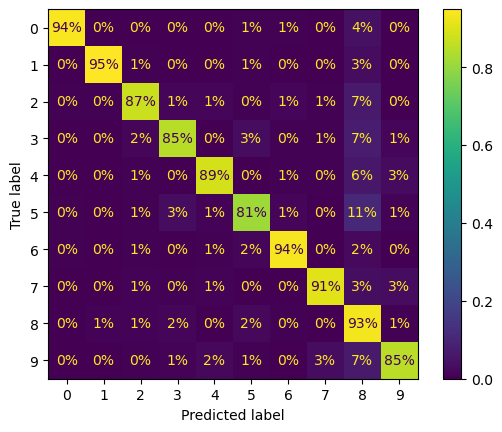

In [47]:
# Display confusion matrix from the predictions of this model.
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, sgd_cv_pred, normalize="true", values_format=".0%")
plt.show()

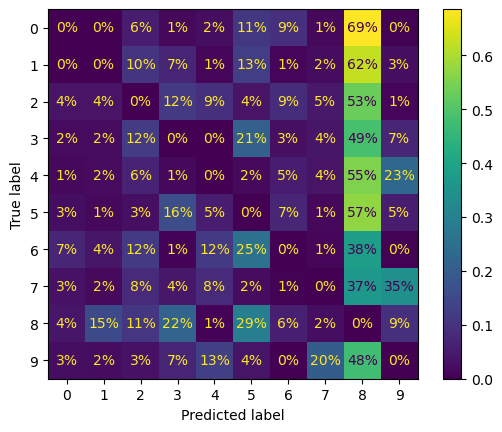

In [52]:
# Impose zero sample weight on correct predictions for making errors stand out.
sample_weights = (y_train != sgd_cv_pred)
ConfusionMatrixDisplay.from_predictions(y_train, sgd_cv_pred, normalize="true", values_format=".0%", sample_weight=sample_weights)
plt.show()

### 3-3: Decision Tree Classifier

In [49]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_clf = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=42))

dt_clf.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [50]:
# Saving the results of the model to compensate training time.
from joblib import dump, load

dump(dt_clf, "DT.pkl")

['DT.pkl']

In [53]:
# Sanity test.
print(dt_clf.predict([some_img]))

['2']


In [54]:
# Performance metric on train and cross validation sets: Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

dt_train_pred = dt_clf.predict(X_train)
dt_cv_pred = cross_val_predict(estimator=dt_clf, X=X_train, y=y_train, cv=3)

print(f"Accuracy on training set: {accuracy_score(y_train, dt_train_pred)}")
print(f"Accuracy on cross validation set: {accuracy_score(y_train, dt_cv_pred)}")

Accuracy on training set: 1.0
Accuracy on cross validation set: 0.8595666666666667


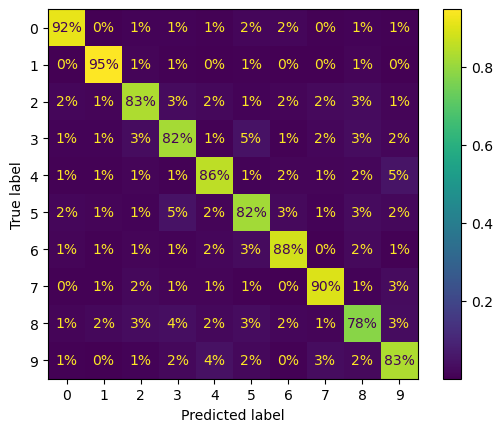

In [55]:
# Display confusion matrix from the predictions of this model.
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, dt_cv_pred, normalize="true", values_format=".0%")
plt.show()

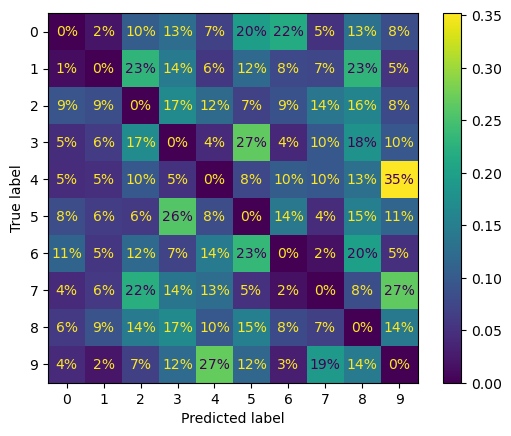

In [56]:
# Impose zero sample weight on correct predictions for making errors stand out.
sample_weights = (y_train != dt_cv_pred)
ConfusionMatrixDisplay.from_predictions(y_train, dt_cv_pred, normalize="true", values_format=".0%", sample_weight=sample_weights)
plt.show()

### 3-4: Random Forest Classifier

In [57]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = make_pipeline(preprocessing, RandomForestClassifier(random_state=42))

rf_clf.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [58]:
# Saving the results of the model to compensate training time.
from joblib import dump, load

dump(rf_clf, "RF.pkl")

['RF.pkl']

In [60]:
# Sanity test.
print(rf_clf.predict([some_img]))

['2']


In [61]:
# Performance metric on train and cross validation sets: Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

rf_train_pred = rf_clf.predict(X_train)
rf_cv_pred = cross_val_predict(estimator=rf_clf, X=X_train, y=y_train, cv=3)

print(f"Accuracy on training set: {accuracy_score(y_train, rf_train_pred)}")
print(f"Accuracy on cross validation set: {accuracy_score(y_train, rf_cv_pred)}")

Accuracy on training set: 1.0
Accuracy on cross validation set: 0.9645666666666667


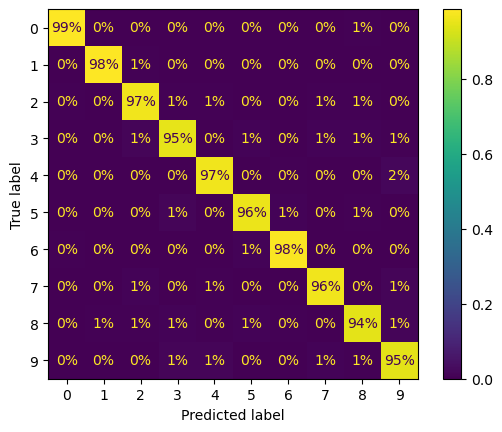

In [62]:
# Display confusion matrix from the predictions of this model.
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, rf_cv_pred, normalize="true", values_format=".0%")
plt.show()

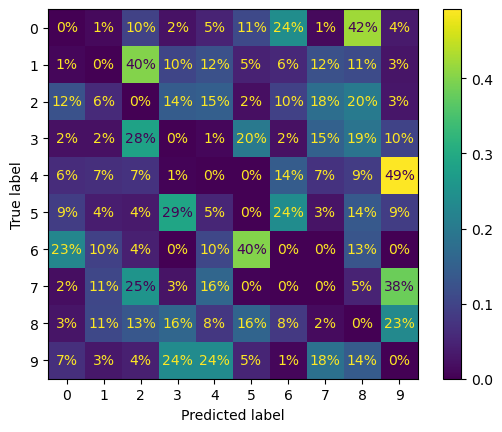

In [63]:
# Impose zero sample weight on correct predictions for making errors stand out.
sample_weights = (y_train != rf_cv_pred)
ConfusionMatrixDisplay.from_predictions(y_train, rf_cv_pred, normalize="true", values_format=".0%", sample_weight=sample_weights)
plt.show()

### 3-5: K Neighbours Classifier

In [64]:
# K Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = make_pipeline(preprocessing, KNeighborsClassifier())

knn_clf.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [65]:
# Saving the results of the model to compensate training time.
from joblib import dump, load

dump(knn_clf, "KNN.pkl")

['KNN.pkl']

In [66]:
# Sanity test.
print(knn_clf.predict([some_img]))

['2']


In [67]:
# Performance metric on train and cross validation sets: Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

knn_train_pred = knn_clf.predict(X_train)
knn_cv_pred = cross_val_predict(estimator=knn_clf, X=X_train, y=y_train, cv=3)

print(f"Accuracy on training set: {accuracy_score(y_train, knn_train_pred)}")
print(f"Accuracy on cross validation set: {accuracy_score(y_train, knn_cv_pred)}")

Accuracy on training set: 0.96425
Accuracy on cross validation set: 0.9403166666666667


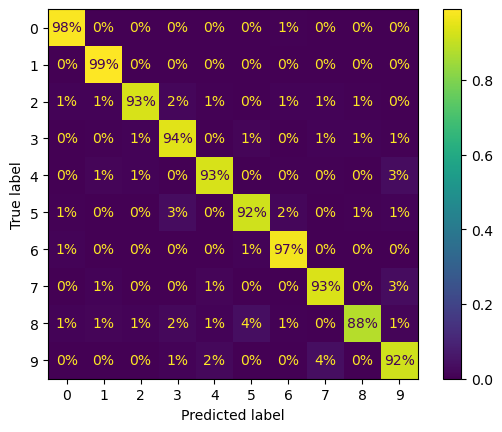

In [68]:
# Display confusion matrix from the predictions of this model.
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, knn_cv_pred, normalize="true", values_format=".0%")
plt.show()

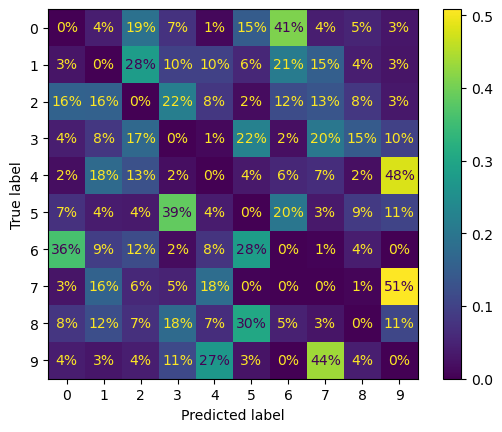

In [69]:
# Impose zero sample weight on correct predictions for making errors stand out.
sample_weights = (y_train != knn_cv_pred)
ConfusionMatrixDisplay.from_predictions(y_train, knn_cv_pred, normalize="true", values_format=".0%", sample_weight=sample_weights)
plt.show()

### 3-6: Adaptive Boosting Classifier

In [29]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adab_clf = make_pipeline(preprocessing, AdaBoostClassifier(random_state=42))

adab_clf.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))])

In [30]:
# Saving the results of the model to compensate training time.
from joblib import dump, load

dump(adab_clf, "ADAB.pkl")

['ADAB.pkl']

In [31]:
# Sanity test.
print(adab_clf.predict([some_img]))

['2']


In [32]:
# Performance metric on train and cross validation sets: Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

adab_train_pred = adab_clf.predict(X_train)
adab_cv_pred = cross_val_predict(estimator=adab_clf, X=X_train, y=y_train.astype("int"), cv=3)

In [33]:
print(f"Accuracy on training set: {accuracy_score(y_train, adab_train_pred)}")
print(f"Accuracy on cross validation set: {accuracy_score(y_train.astype('int'), adab_cv_pred)}")

Accuracy on training set: 0.7284333333333334
Accuracy on cross validation set: 0.72135


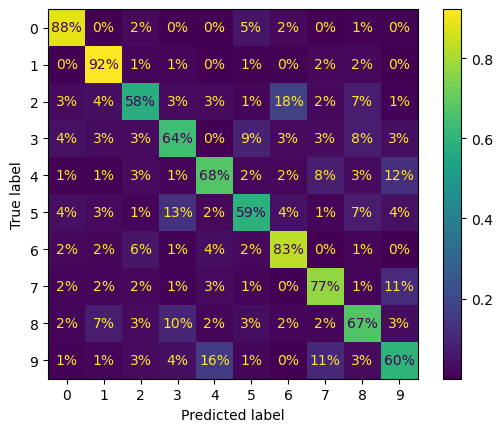

In [34]:
# Display confusion matrix from the predictions of this model.
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train.astype("int"), adab_cv_pred, normalize="true", values_format=".0%")
plt.show()

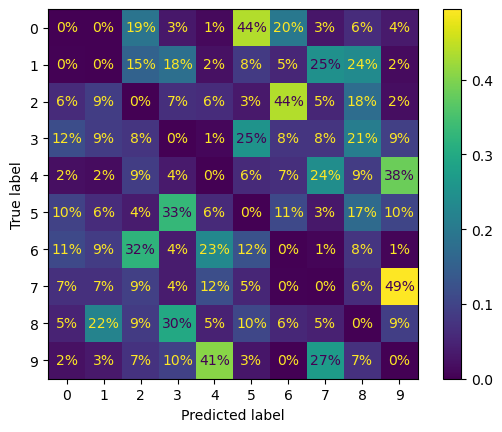

In [35]:
# Impose zero sample weight on correct predictions for making errors stand out.
sample_weights = (y_train.astype("int") != adab_cv_pred)
ConfusionMatrixDisplay.from_predictions(y_train.astype("int"), adab_cv_pred, normalize="true", values_format=".0%", sample_weight=sample_weights)
plt.show()

### 3-7: Gradient Boosting Classifier

In [36]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [37]:
# Saving the results of the model to compensate training time.
from joblib import dump, load

dump(gb_clf, "GB.pkl")

['GB.pkl']

In [38]:
# Sanity test.
print(gb_clf.predict([some_img]))

['2']


In [39]:
# Performance metric on train and cross validation sets: Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

gb_train_pred = gb_clf.predict(X_train)
gb_cv_pred = cross_val_predict(estimator=gb_clf, X=X_train, y=y_train.astype("int"), cv=3)

In [40]:
print(f"Accuracy on training set: {accuracy_score(y_train, gb_train_pred)}")
print(f"Accuracy on cross validation set: {accuracy_score(y_train.astype('int'), gb_cv_pred)}")

Accuracy on training set: 0.96155
Accuracy on cross validation set: 0.9427333333333333


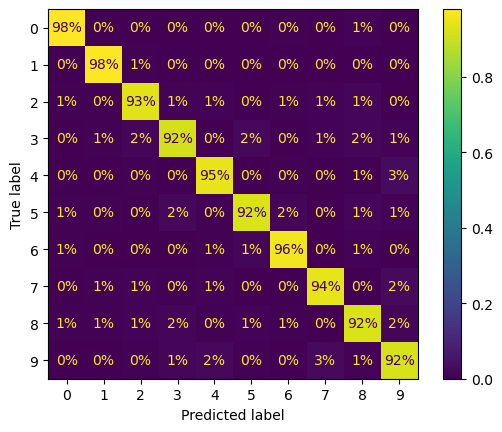

In [41]:
# Display confusion matrix from the predictions of this model.
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train.astype("int"), gb_cv_pred, normalize="true", values_format=".0%")
plt.show()

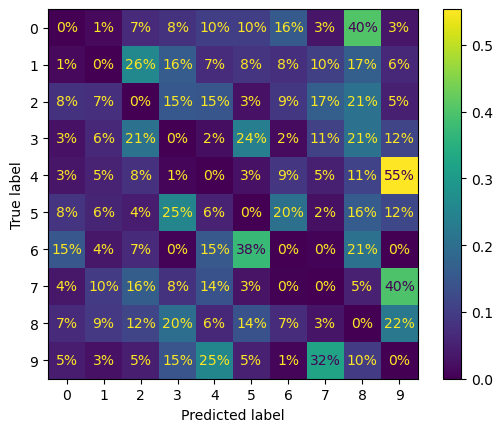

In [42]:
# Impose zero sample weight on correct predictions for making errors stand out.
sample_weights = (y_train.astype("int") != gb_cv_pred)
ConfusionMatrixDisplay.from_predictions(y_train.astype("int"), gb_cv_pred, normalize="true", values_format=".0%", sample_weight=sample_weights)
plt.show()

### 3-8: Extreme Gradient Boost Classifier

In [26]:
# XGBoost Classifier
from xgboost import XGBClassifier

xgb_clf = make_pipeline(preprocessing, XGBClassifier())

xgb_clf.fit(X_train, y_train.astype("int"))

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [27]:
# Saving the results of the model to compensate training time.
from joblib import dump, load

dump(xgb_clf, "XGB-2.pkl")

['XGB-2.pkl']

In [28]:
# Sanity test.
print(xgb_clf.predict([some_img]))

[2]


In [29]:
# Performance metric on train and cross validation sets: Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

xgb_train_pred = xgb_clf.predict(X_train)
xgb_cv_pred = cross_val_predict(estimator=xgb_clf, X=X_train, y=y_train.astype("int"), cv=3)

In [35]:
print(f"Accuracy on training set: {accuracy_score(y_train.astype('int'), xgb_train_pred)}")
print(f"Accuracy on cross validation set: {accuracy_score(y_train.astype('int'), xgb_cv_pred)}")

Accuracy on training set: 1.0
Accuracy on cross validation set: 0.9728166666666667


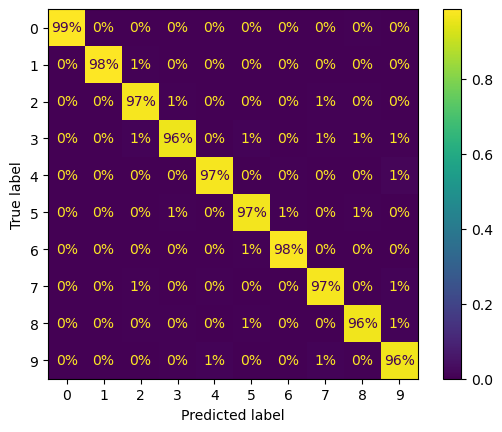

In [36]:
# Display confusion matrix from the predictions of this model.
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train.astype("int"), xgb_cv_pred, normalize="true", values_format=".0%")
plt.show()

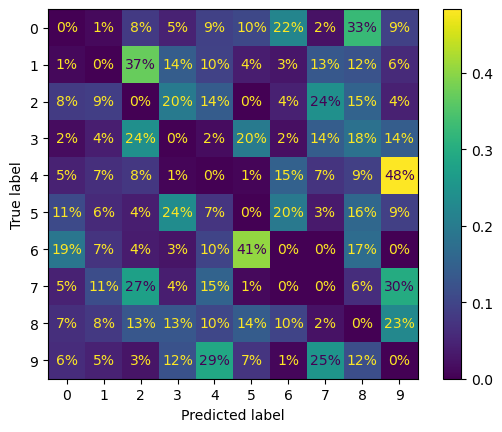

In [37]:
# Impose zero sample weight on correct predictions for making errors stand out.
sample_weights = (y_train.astype("int") != xgb_cv_pred)
ConfusionMatrixDisplay.from_predictions(y_train.astype("int"), xgb_cv_pred, normalize="true", values_format=".0%", sample_weight=sample_weights)
plt.show()

## 4: Fine Tune Short Listed Model
Extreme Gradient Boost Classifier 


In [38]:
from xgboost import XGBClassifier

xgb_clf2 = make_pipeline(preprocessing, XGBClassifier(random_state=42, min_child_weight=1.2, max_depth=5))

In [39]:
xgb_clf2.fit(X_train, y_train.astype("int"))

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=1.2, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [40]:
xgb_train2 = xgb_clf2.predict(X_train)
print(accuracy_score(y_train.astype("int"), xgb_train2))

1.0


In [41]:
# Sanity test.
print(xgb_clf2.predict([some_img]))

[2]


In [42]:
# Performance metric on train and cross validation sets: Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

xgb_train_pred2 = xgb_clf2.predict(X_train)
xgb_cv_pred2 = cross_val_predict(estimator=xgb_clf2, X=X_train, y=y_train.astype("int"), cv=3)

In [43]:
print(f"Accuracy on training set: {accuracy_score(y_train.astype('int'), xgb_train_pred2)}")
print(f"Accuracy on cross validation set: {accuracy_score(y_train.astype('int'), xgb_cv_pred2)}")

Accuracy on training set: 1.0
Accuracy on cross validation set: 0.9720333333333333


In [44]:
# Try with some other hyperparams

In [45]:
xgb_clf3 = make_pipeline(preprocessing, XGBClassifier(random_state=42, min_child_weight=1.5, max_depth=5, reg_lambda=1.5))
xgb_clf3.fit(X_train, y_train.astype("int"))

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=1.5, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [46]:
# Sanity test.
print(xgb_clf3.predict([some_img]))

[2]


In [47]:
# Performance metric on train and cross validation sets: Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

xgb_train_pred3 = xgb_clf3.predict(X_train)
xgb_cv_pred3 = cross_val_predict(estimator=xgb_clf3, X=X_train, y=y_train.astype("int"), cv=3)

In [48]:
print(f"Accuracy on training set: {accuracy_score(y_train.astype('int'), xgb_train_pred3)}")
print(f"Accuracy on cross validation set: {accuracy_score(y_train.astype('int'), xgb_cv_pred3)}")

Accuracy on training set: 0.9999333333333333
Accuracy on cross validation set: 0.9724833333333334


In [49]:
# Try on some other hyperparameters combination

In [54]:
xgb_clf4 = make_pipeline(preprocessing, XGBClassifier(random_state=42, min_child_weight=0.8, max_depth=6, reg_lambda=0.8))
xgb_clf4.fit(X_train, y_train.astype("int"))

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=0.8, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [55]:
# Sanity test.
print(xgb_clf4.predict([some_img]))

[2]


In [56]:
# Performance metric on train and cross validation sets: Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

xgb_train_pred4 = xgb_clf4.predict(X_train)
xgb_cv_pred4 = cross_val_predict(estimator=xgb_clf4, X=X_train, y=y_train.astype("int"), cv=3)

In [57]:
print(f"Accuracy on training set: {accuracy_score(y_train.astype('int'), xgb_train_pred4)}")
print(f"Accuracy on cross validation set: {accuracy_score(y_train.astype('int'), xgb_cv_pred4)}")

Accuracy on training set: 1.0
Accuracy on cross validation set: 0.9729166666666667


In [58]:
# Let's try to bring up cv error to 98% !

In [63]:
xgb_clf5 = make_pipeline(preprocessing, XGBClassifier(random_state=42, min_child_weight=0.75, max_depth=6, reg_lambda=0.75))
xgb_clf5.fit(X_train, y_train.astype("int"))

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=0.75, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [64]:
# Sanity test.
print(xgb_clf5.predict([some_img]))

[2]


In [65]:
# Performance metric on train and cross validation sets: Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

xgb_train_pred5 = xgb_clf5.predict(X_train)
xgb_cv_pred5 = cross_val_predict(estimator=xgb_clf5, X=X_train, y=y_train.astype("int"), cv=3)

In [66]:
print(f"Accuracy on training set: {accuracy_score(y_train.astype('int'), xgb_train_pred5)}")
print(f"Accuracy on cross validation set: {accuracy_score(y_train.astype('int'), xgb_cv_pred5)}")

Accuracy on training set: 1.0
Accuracy on cross validation set: 0.9732666666666666


In [69]:
print(xgb_clf5.predict([some_img]))
print(np.max(xgb_clf5.predict_proba([some_img])))

[2]
0.9998735


In [74]:
xgb_clf6 = make_pipeline(preprocessing, XGBClassifier(random_state=42, min_child_weight=0.75, max_depth=6, reg_lambda=0.75, eta=0.4))
xgb_clf6.fit(X_train, y_train.astype("int"))

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eta=0.4,
                               eval_metric=None, feature_types=None, gamma=None,
                               gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=0.75, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [75]:
# Sanity test.
print(xgb_clf6.predict([some_img]))
print(np.max(xgb_clf6.predict_proba([some_img])))

[2]
0.9999666


In [76]:
# Performance metric on train and cross validation sets: Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

xgb_train_pred6 = xgb_clf6.predict(X_train)
xgb_cv_pred6 = cross_val_predict(estimator=xgb_clf6, X=X_train, y=y_train.astype("int"), cv=3)

In [77]:
print(f"Accuracy on training set: {accuracy_score(y_train.astype('int'), xgb_train_pred6)}")
print(f"Accuracy on cross validation set: {accuracy_score(y_train.astype('int'), xgb_cv_pred6)}")

Accuracy on training set: 1.0
Accuracy on cross validation set: 0.9736666666666667


## 5: Save The Final Model.

In [83]:
from joblib import dump

dump(xgb_clf6, "models/finalxgb.pkl")

['models/finalxgb.pkl']

## 6: Compute Test Error on Selected Model

In [7]:
from joblib import load
import warnings
warnings.filterwarnings("ignore")

final_model = load("/Users/naveenkumar/Documents/Project/models/finalxgb.pkl")

In [9]:
from sklearn.metrics import accuracy_score

test_preds = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test.astype("int"), test_preds)

print(f"Test accuracy: {test_accuracy * 100}%")

Test accuracy: 97.97%
